In [48]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from Systems.HenonHeiles import *
from Systems.Generate_Data import *
from HamiltonianNeuralNetwork.pHNN import *
from NumericalIntegration.Numerical_Integration import *
from HamiltonianNeuralNetwork.Train import *
from HamiltonianNeuralNetwork.plotting import *
from HamiltonianNeuralNetwork.Training_Fourier_Basis import *


torch.random.manual_seed(1)
np.random.seed(33)
mps_device = torch.device("mps")

plt.rcParams['font.size'] = 12
plt.rcParams['lines.markersize'] = 10
plt.rcParams['legend.fontsize'] = 10
colors = sns.color_palette([(0.6,0.8,.8), (1,0.7,0.3), (0.2,0.7,0.2), (0.8,0,0.2), (0,0.4,1), (0.6,0.5,.9), (0.5,0.3,.5)])

In [49]:
sys = HenonHeilesExternalForce()


model_exp_Sin_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_Sin()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_exp_fourier_Sin_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_Sin()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_Sin_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_Sin()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_fourier_Sin_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_Sin()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )

model_exp_PAU_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_PAU()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_exp_fourier_PAU_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_PAU()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_PAU_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_PAU()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_fourier_PAU_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_PAU()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )

#model_exp_Tanh_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_Tanh()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_exp_fourier_Tanh_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_Tanh()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_symp_Tanh_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_Tanh()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_symp_fourier_Tanh_Softplus, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_Tanh()_Softplus(beta=1.0, threshold=20.0)_batchsize_64_shape_torch.Size([879200, 4]).pt" )

model_exp_Sin_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_Sin()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_exp_fourier_Sin_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_Sin()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_Sin_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_Sin()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_fourier_Sin_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_Sin()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )

model_exp_PAU_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_PAU()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_exp_fourier_PAU_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_PAU()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_PAU_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_PAU()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
model_symp_fourier_PAU_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_PAU()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )

#model_exp_Tanh_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_50epoch_Tanh()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_exp_fourier_Tanh_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_midpoint_100epoch_Tanh()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_symp_Tanh_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_50epoch_Tanh()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )
#model_symp_fourier_Tanh_ReLU, _, _  = load_model(path = "Models/HenonHeilesExternalForce/HenonHeilesExternalForce_symplectic midpoint_100epoch_Tanh()_ReLU()_batchsize_64_shape_torch.Size([879200, 4]).pt" )



In [50]:
model_exp = model_exp_PAU_Softplus
model_exp_fourier = model_exp_fourier_PAU_Softplus
model_symp = model_symp_PAU_Softplus
model_symp_fourier = model_symp_fourier_PAU_Softplus

### Predicting - Training Interval

In [51]:
tmax = 6*np.pi
nsamples = int(100*tmax/6)
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
integrator = "midpoint"
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

100%|██████████| 1/1 [00:00<00:00, 98.75it/s]


/Users/sannejamila/Documents/Vår 2025/Prosjektoppgave/Oppgave_github/HNNs_ODEs/HamiltonianNeuralNetwork/pHNN.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u0 = torch.tensor(u0,dtype = torch.float32)


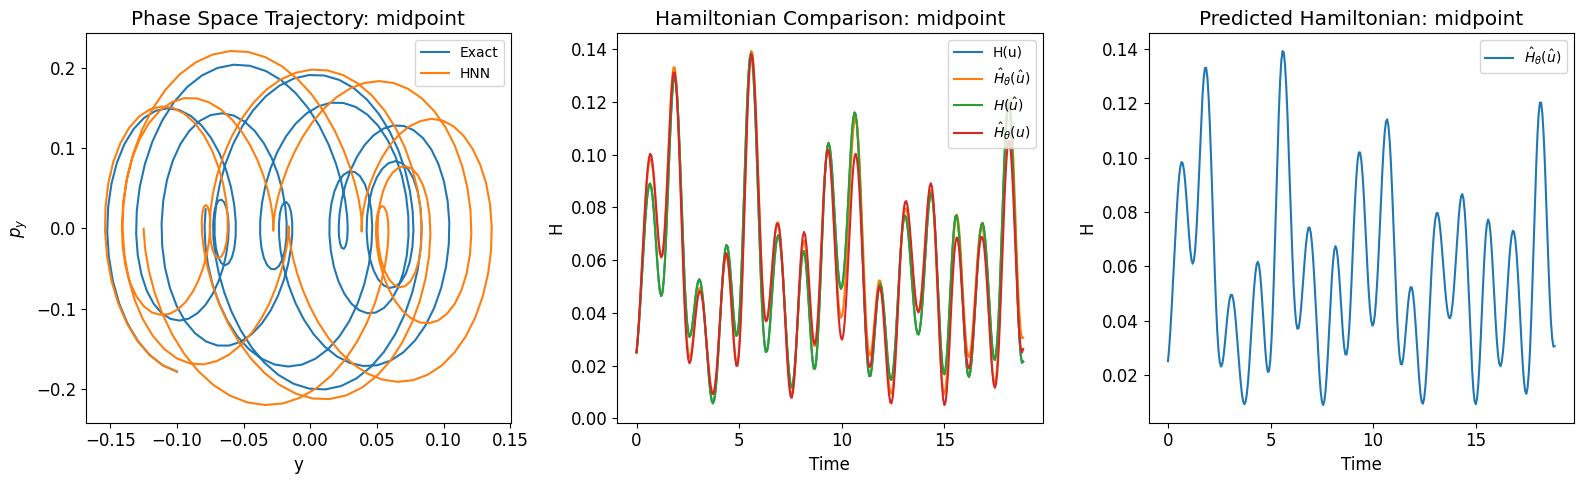

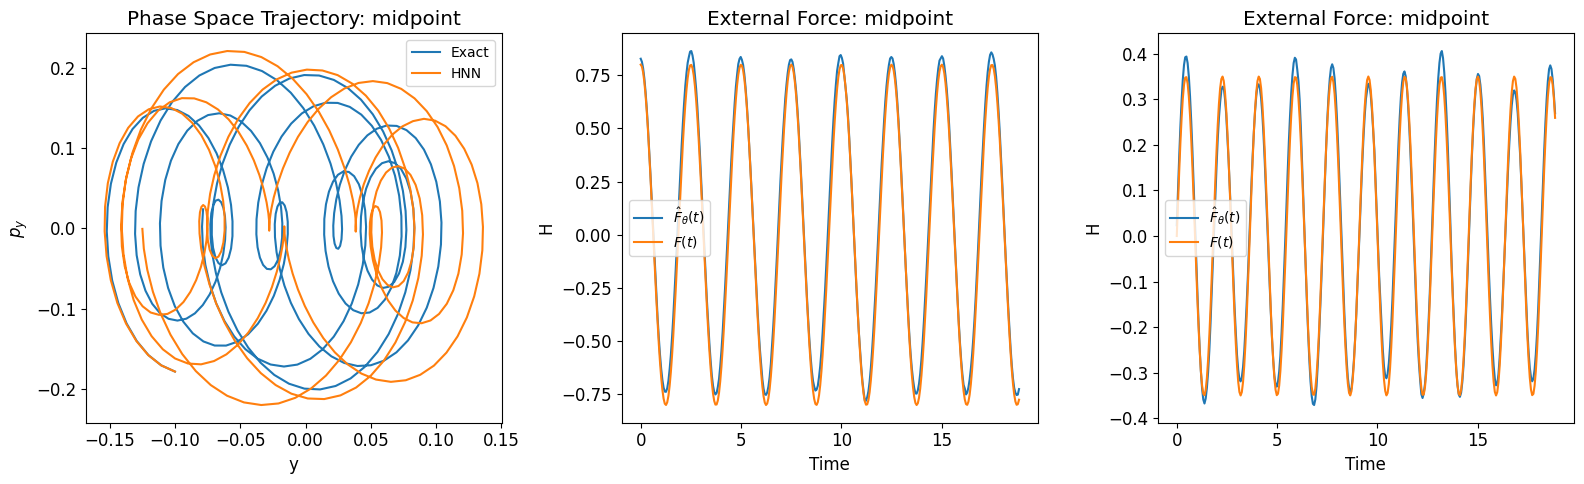

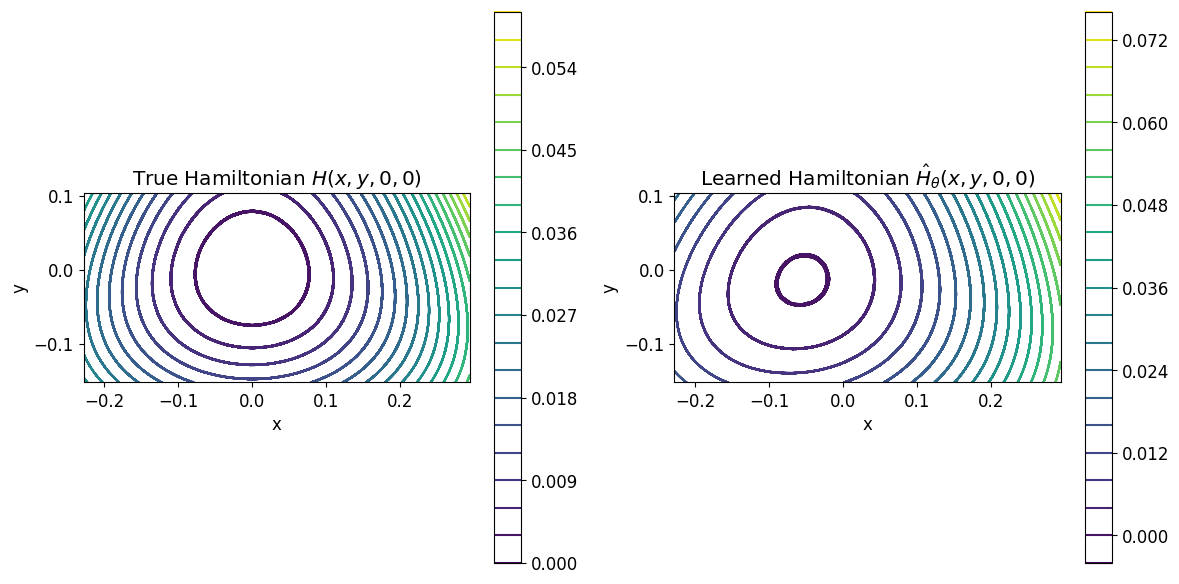

In [52]:
u_phnn_exp, t_sample = model_exp.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)
u_pred = u_phnn_exp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_exp,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_exp, sys, u_exact[0])


### Predicting from Explicit Midpoint - Longer Interval

In [53]:
tmax = 12*np.pi
nsamples = int(100*tmax/12)
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
integrator = "midpoint"
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

100%|██████████| 1/1 [00:00<00:00, 120.66it/s]


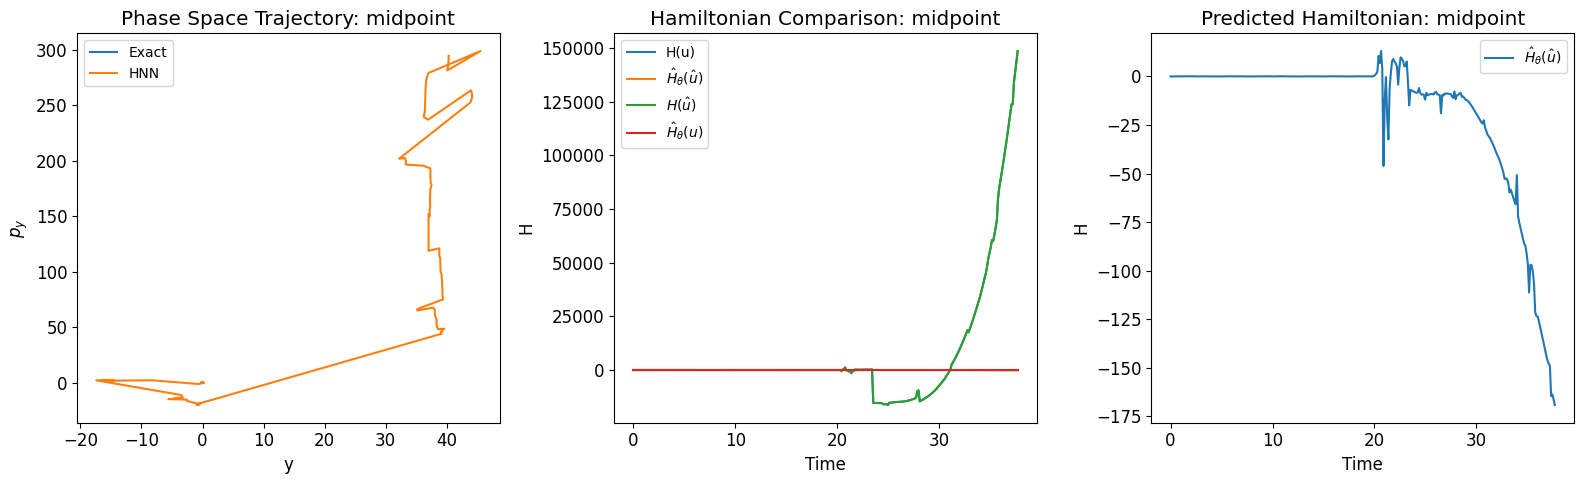

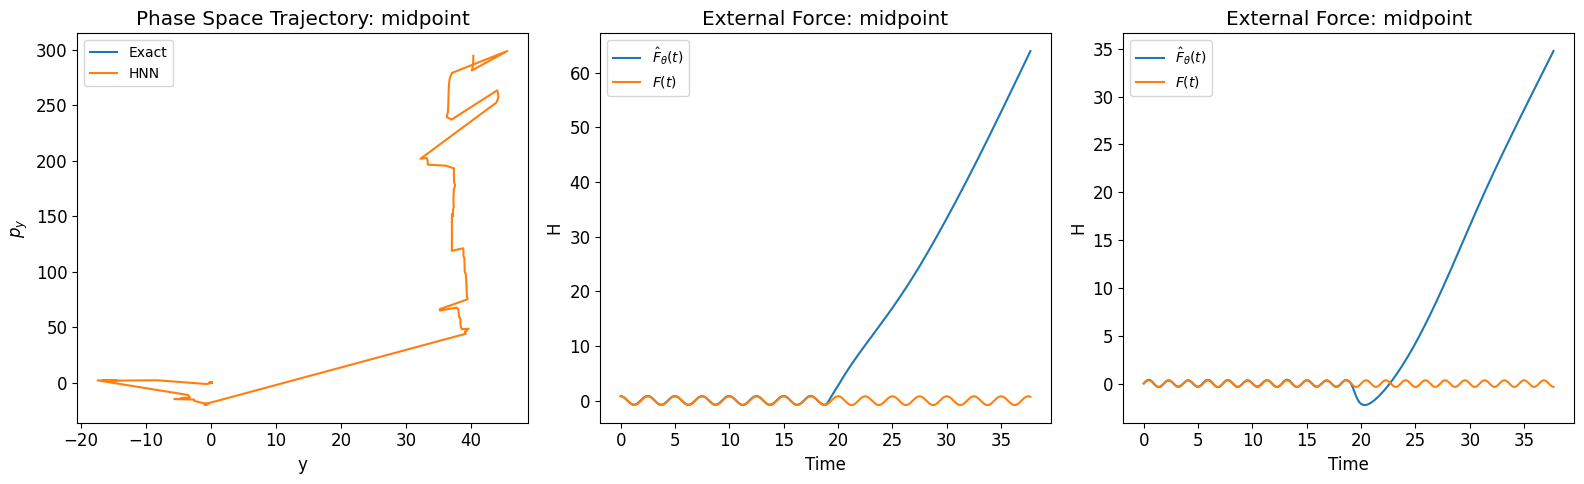

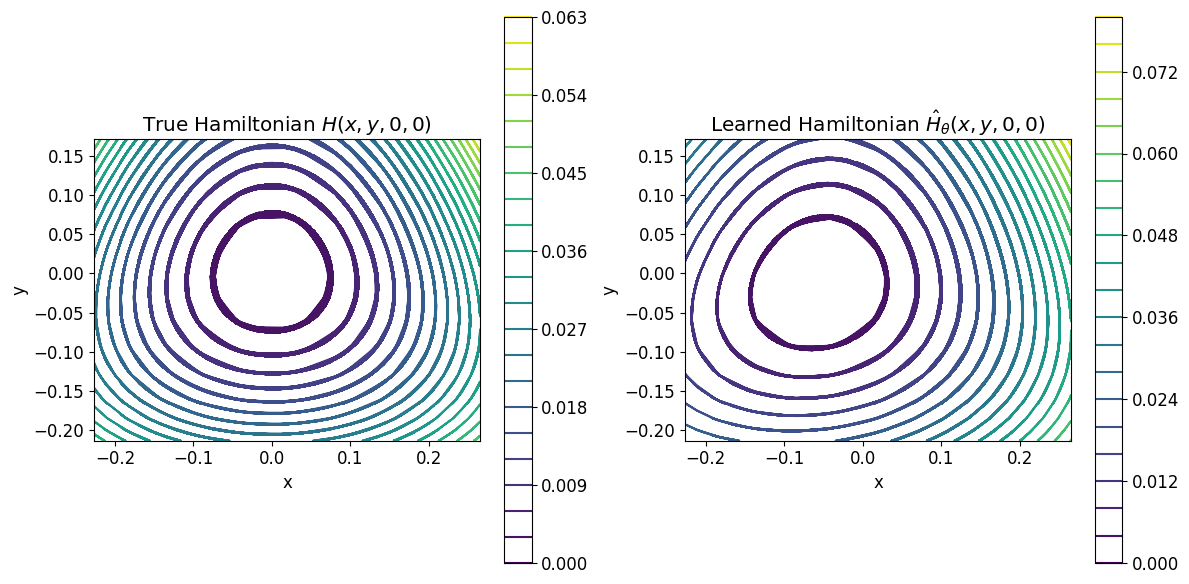

In [54]:
u_phnn_exp, t_sample = model_exp.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)
u_pred = u_phnn_exp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_exp,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_exp, sys, u_exact[0])

### Predicting Explicit Midpoint - New training

In [55]:
tmax = 12*np.pi
nsamples = int(100*tmax/12)
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
integrator = "midpoint"
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)



100%|██████████| 1/1 [00:00<00:00, 121.29it/s]


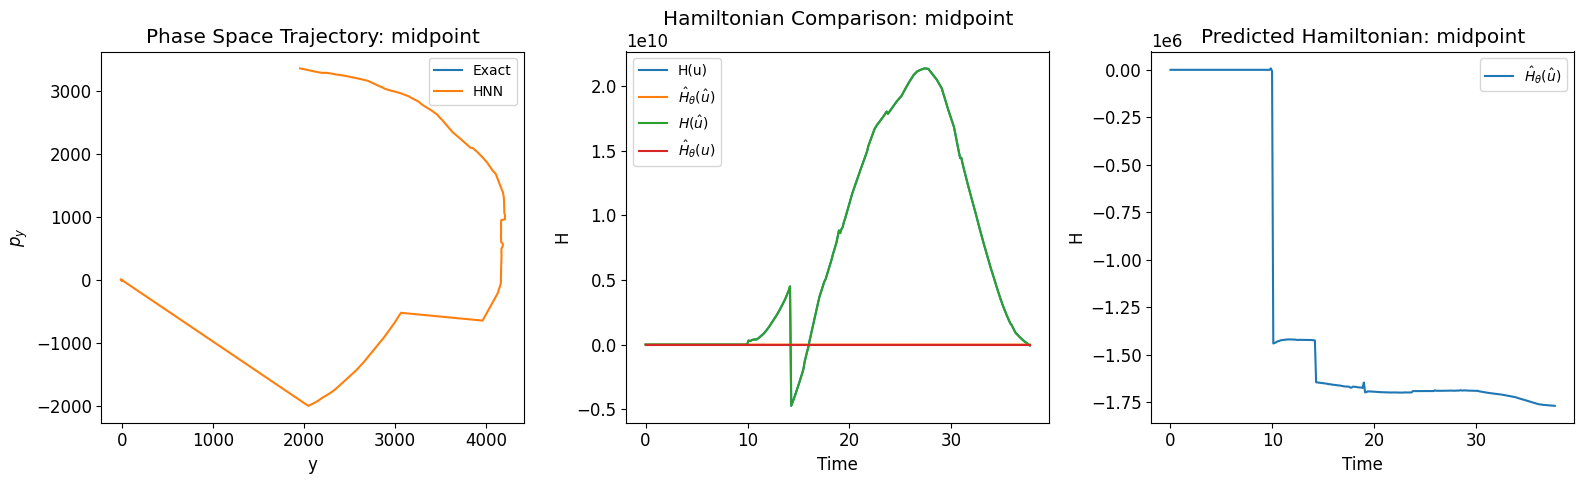

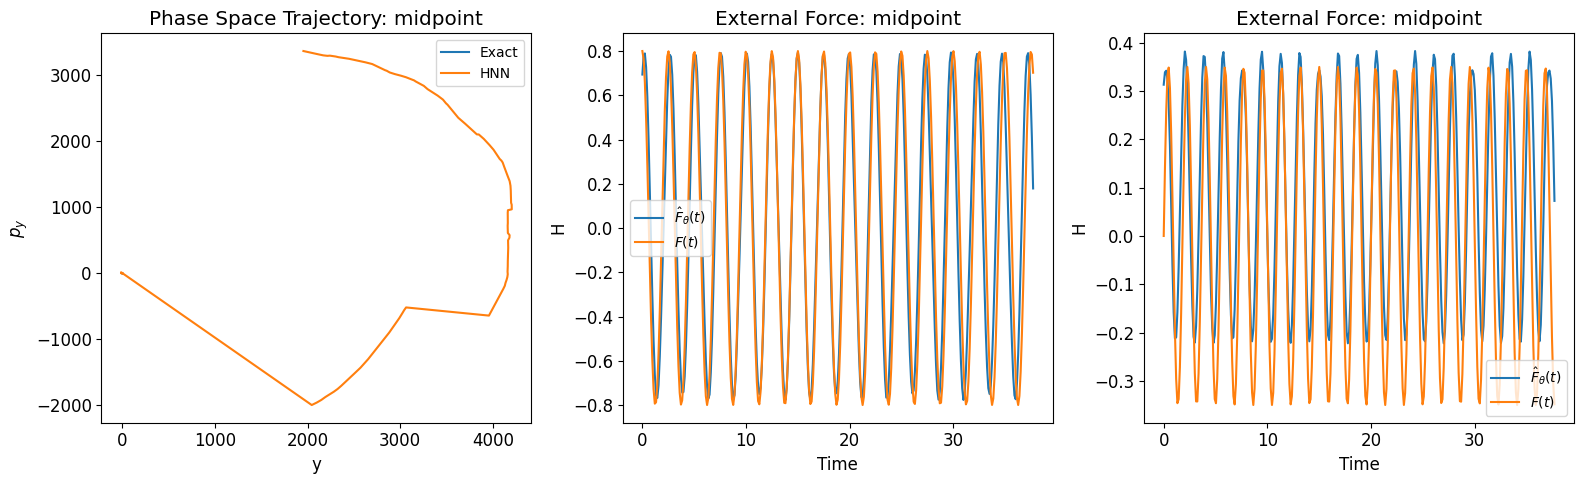

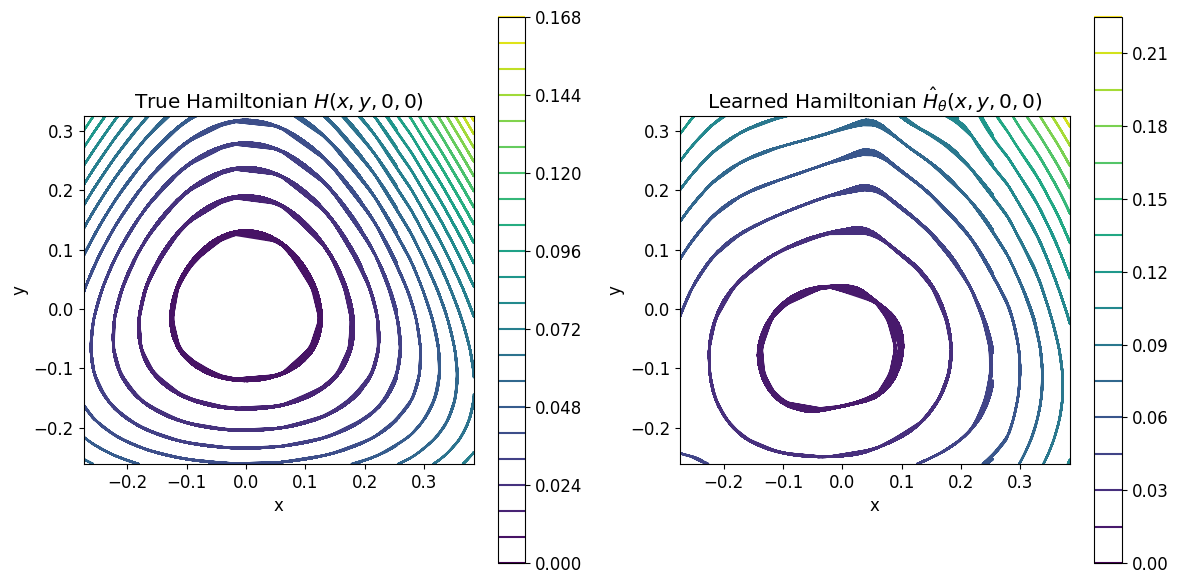

In [56]:
u_phnn_exp, t_sample = model_exp_fourier.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)
u_pred = u_phnn_exp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_exp_fourier,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_exp_fourier, sys, u_exact[0])

## Symplectic Midpoint 

In [57]:
tmax = 6*np.pi
nsamples = int(100*tmax/6)
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

100%|██████████| 1/1 [00:00<00:00, 108.48it/s]


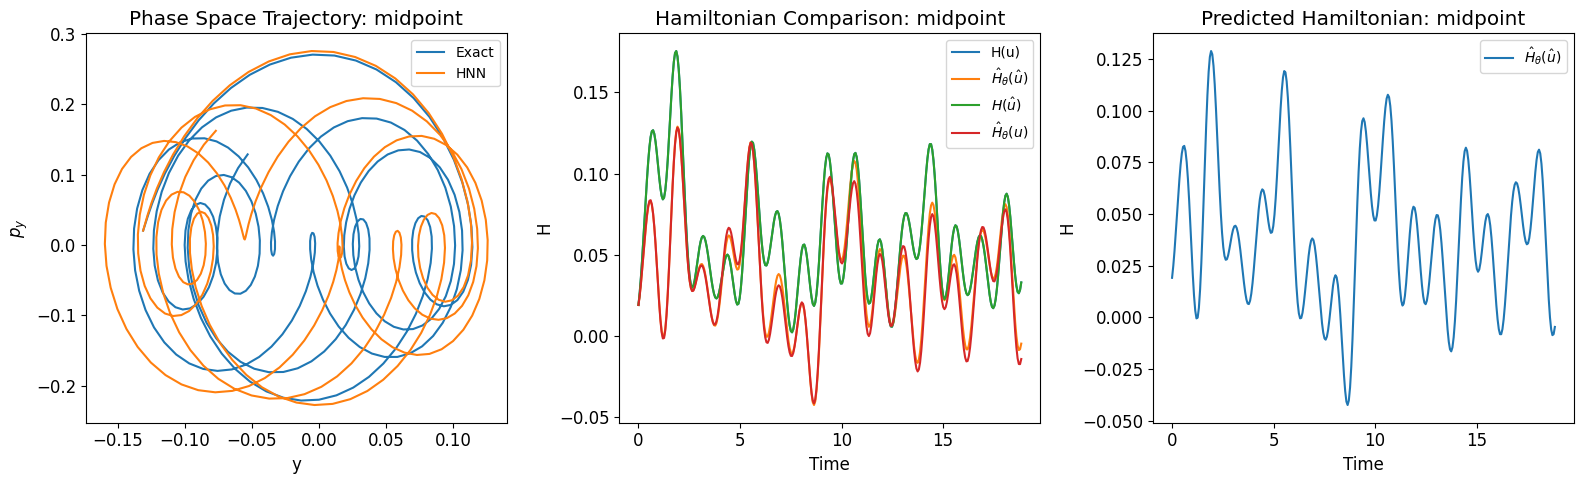

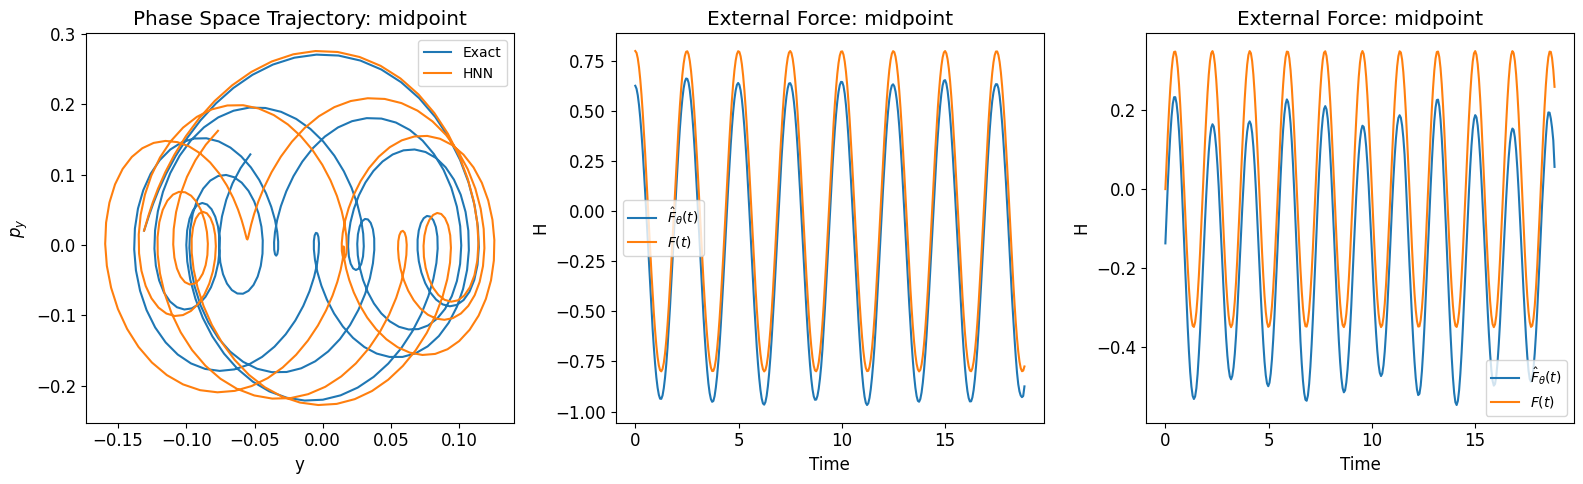

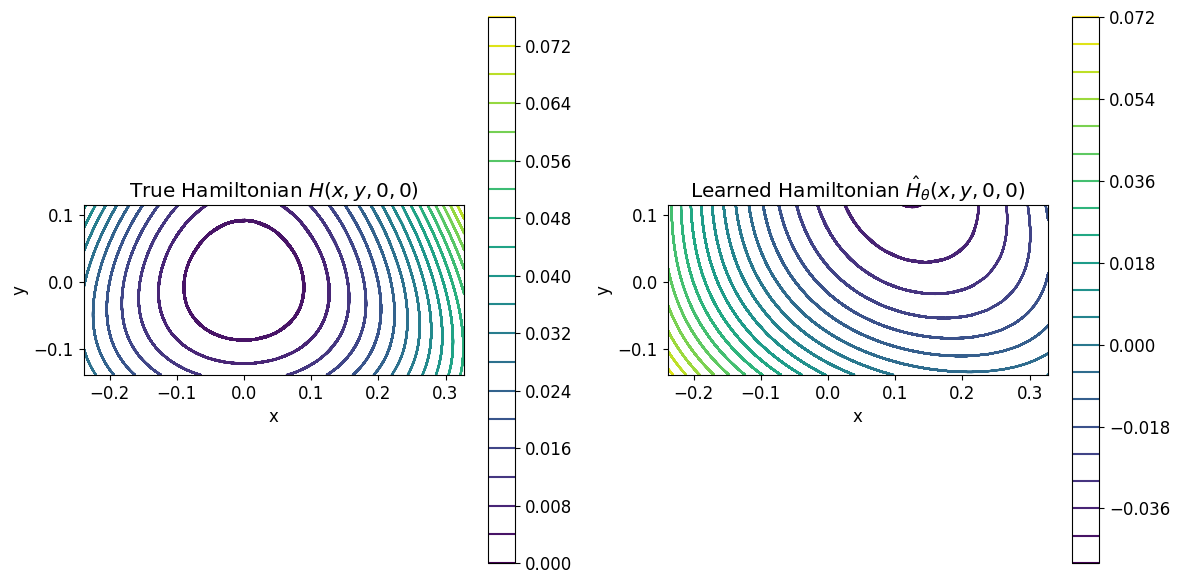

In [58]:
u_phnn_symp, t_sample = model_symp.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)

u_pred = u_phnn_symp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_symp,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_symp, sys, u_exact[0])

### Predicting from Symplectic Midpoint - Testing Interval

In [59]:
tmax = 12*np.pi
nsamples = int(100*tmax/12)
dt = tmax/nsamples
epochs = 100


nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

100%|██████████| 1/1 [00:00<00:00, 122.01it/s]


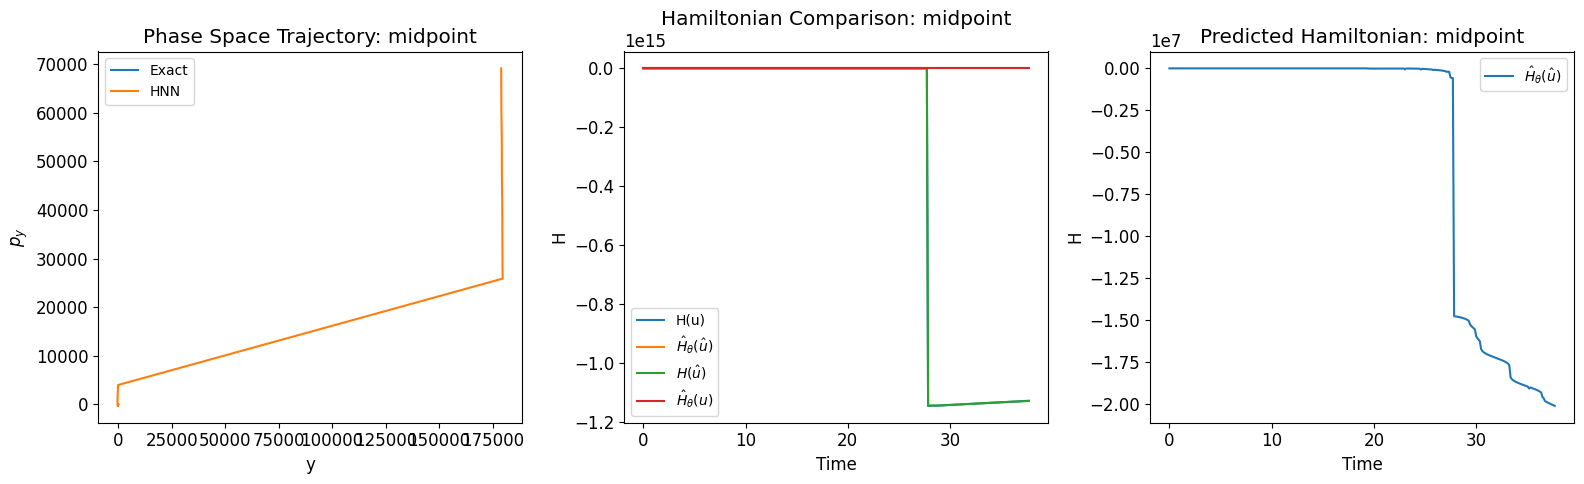

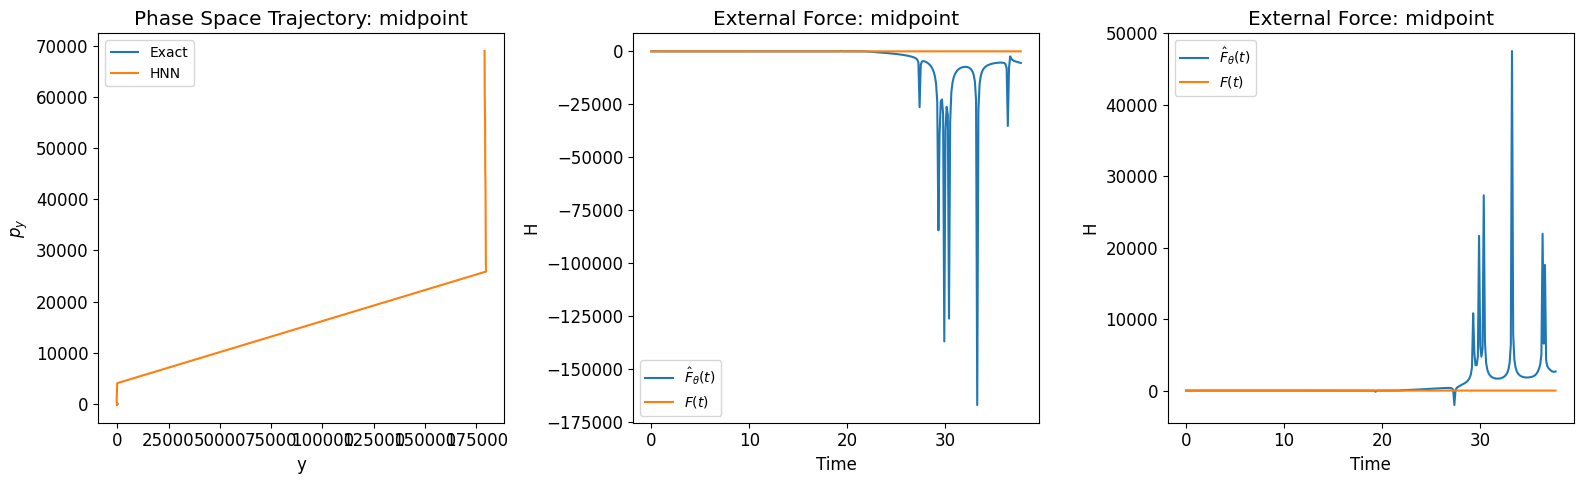

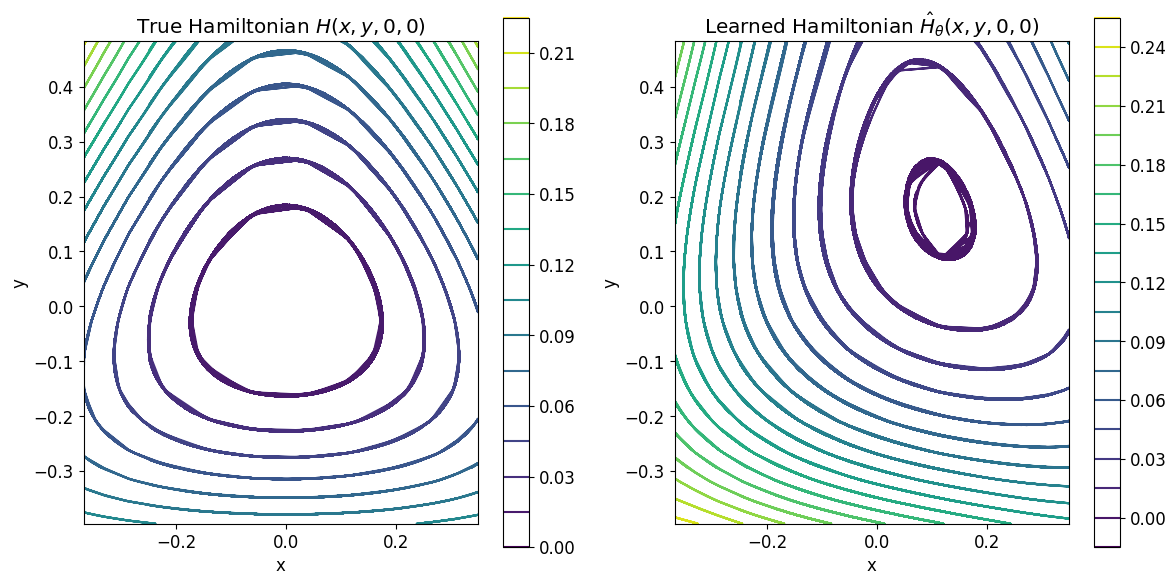

In [60]:
u_phnn_symp, t_sample = model_symp.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)

u_pred = u_phnn_symp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_symp,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_symp, sys, u_exact[0])

### Predicting Symplectic Midpoint - New training


In [61]:
tmax = 12*np.pi
nsamples = int(100*tmax/12)
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)
integrator = "midpoint"
ntrajectories = 1

(u_start, u_end, t_start, dt), dudt, u_exact, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

100%|██████████| 1/1 [00:00<00:00, 120.44it/s]


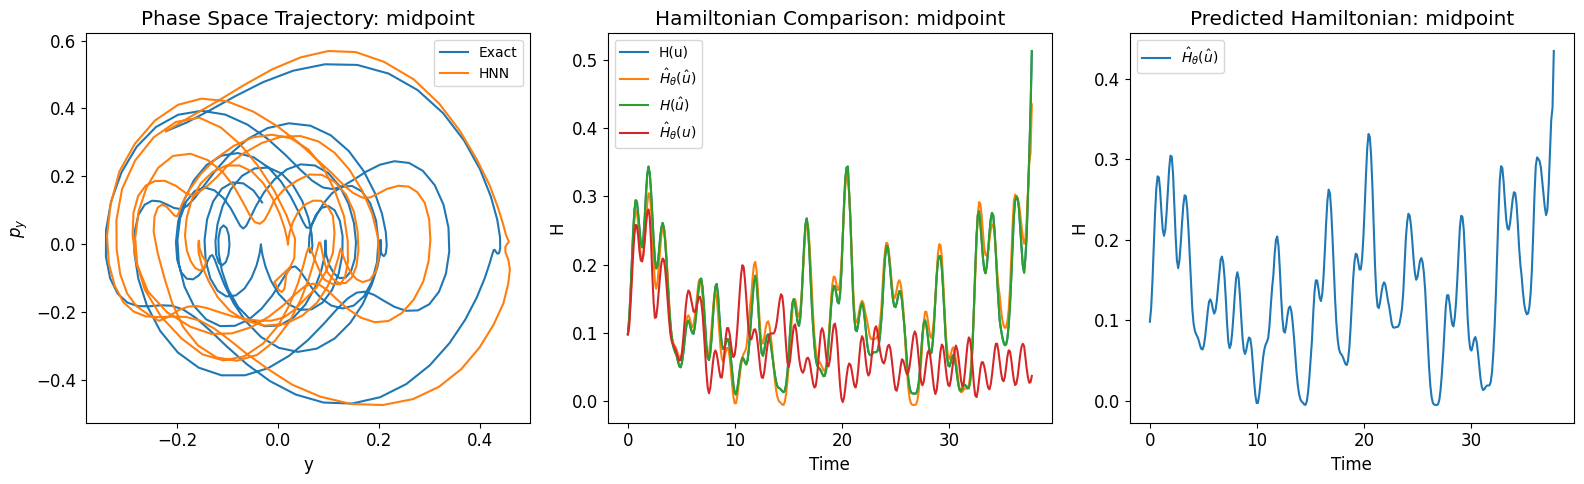

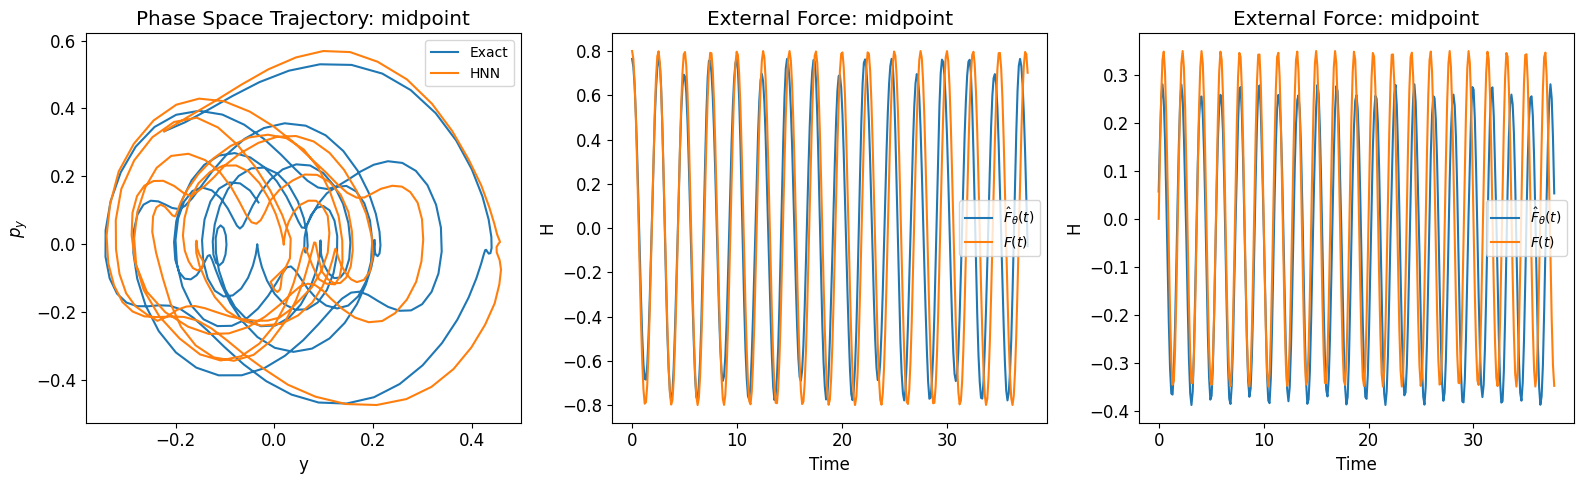

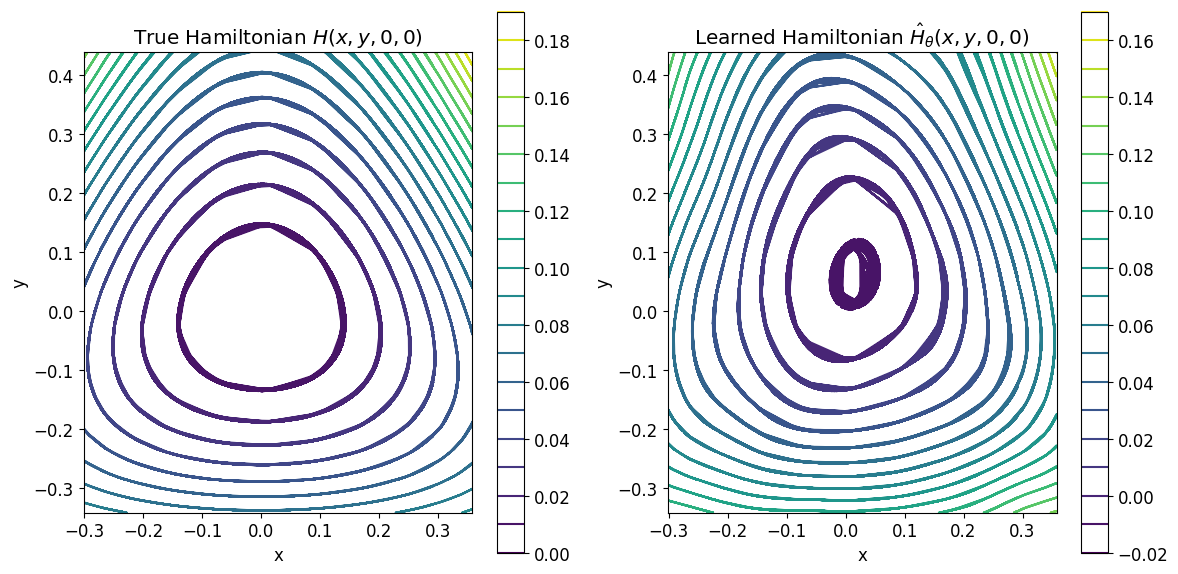

In [62]:
u_phnn_symp, t_sample = model_symp_fourier.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)
u_pred = u_phnn_symp[0].detach().numpy()
u0 = u0s
plot_PHNN_prediction(model_symp_fourier,u_pred,u_exact,t_sample,sys,u0,integrator)
contour_plot_Hamiltonian(model_symp_fourier, sys, u_exact[0])